Week 5
===
Goal
---
To implement a Dashboard with side bar, 建立具有選項的看盤應用程式


In [2]:
from IPython.display import Image

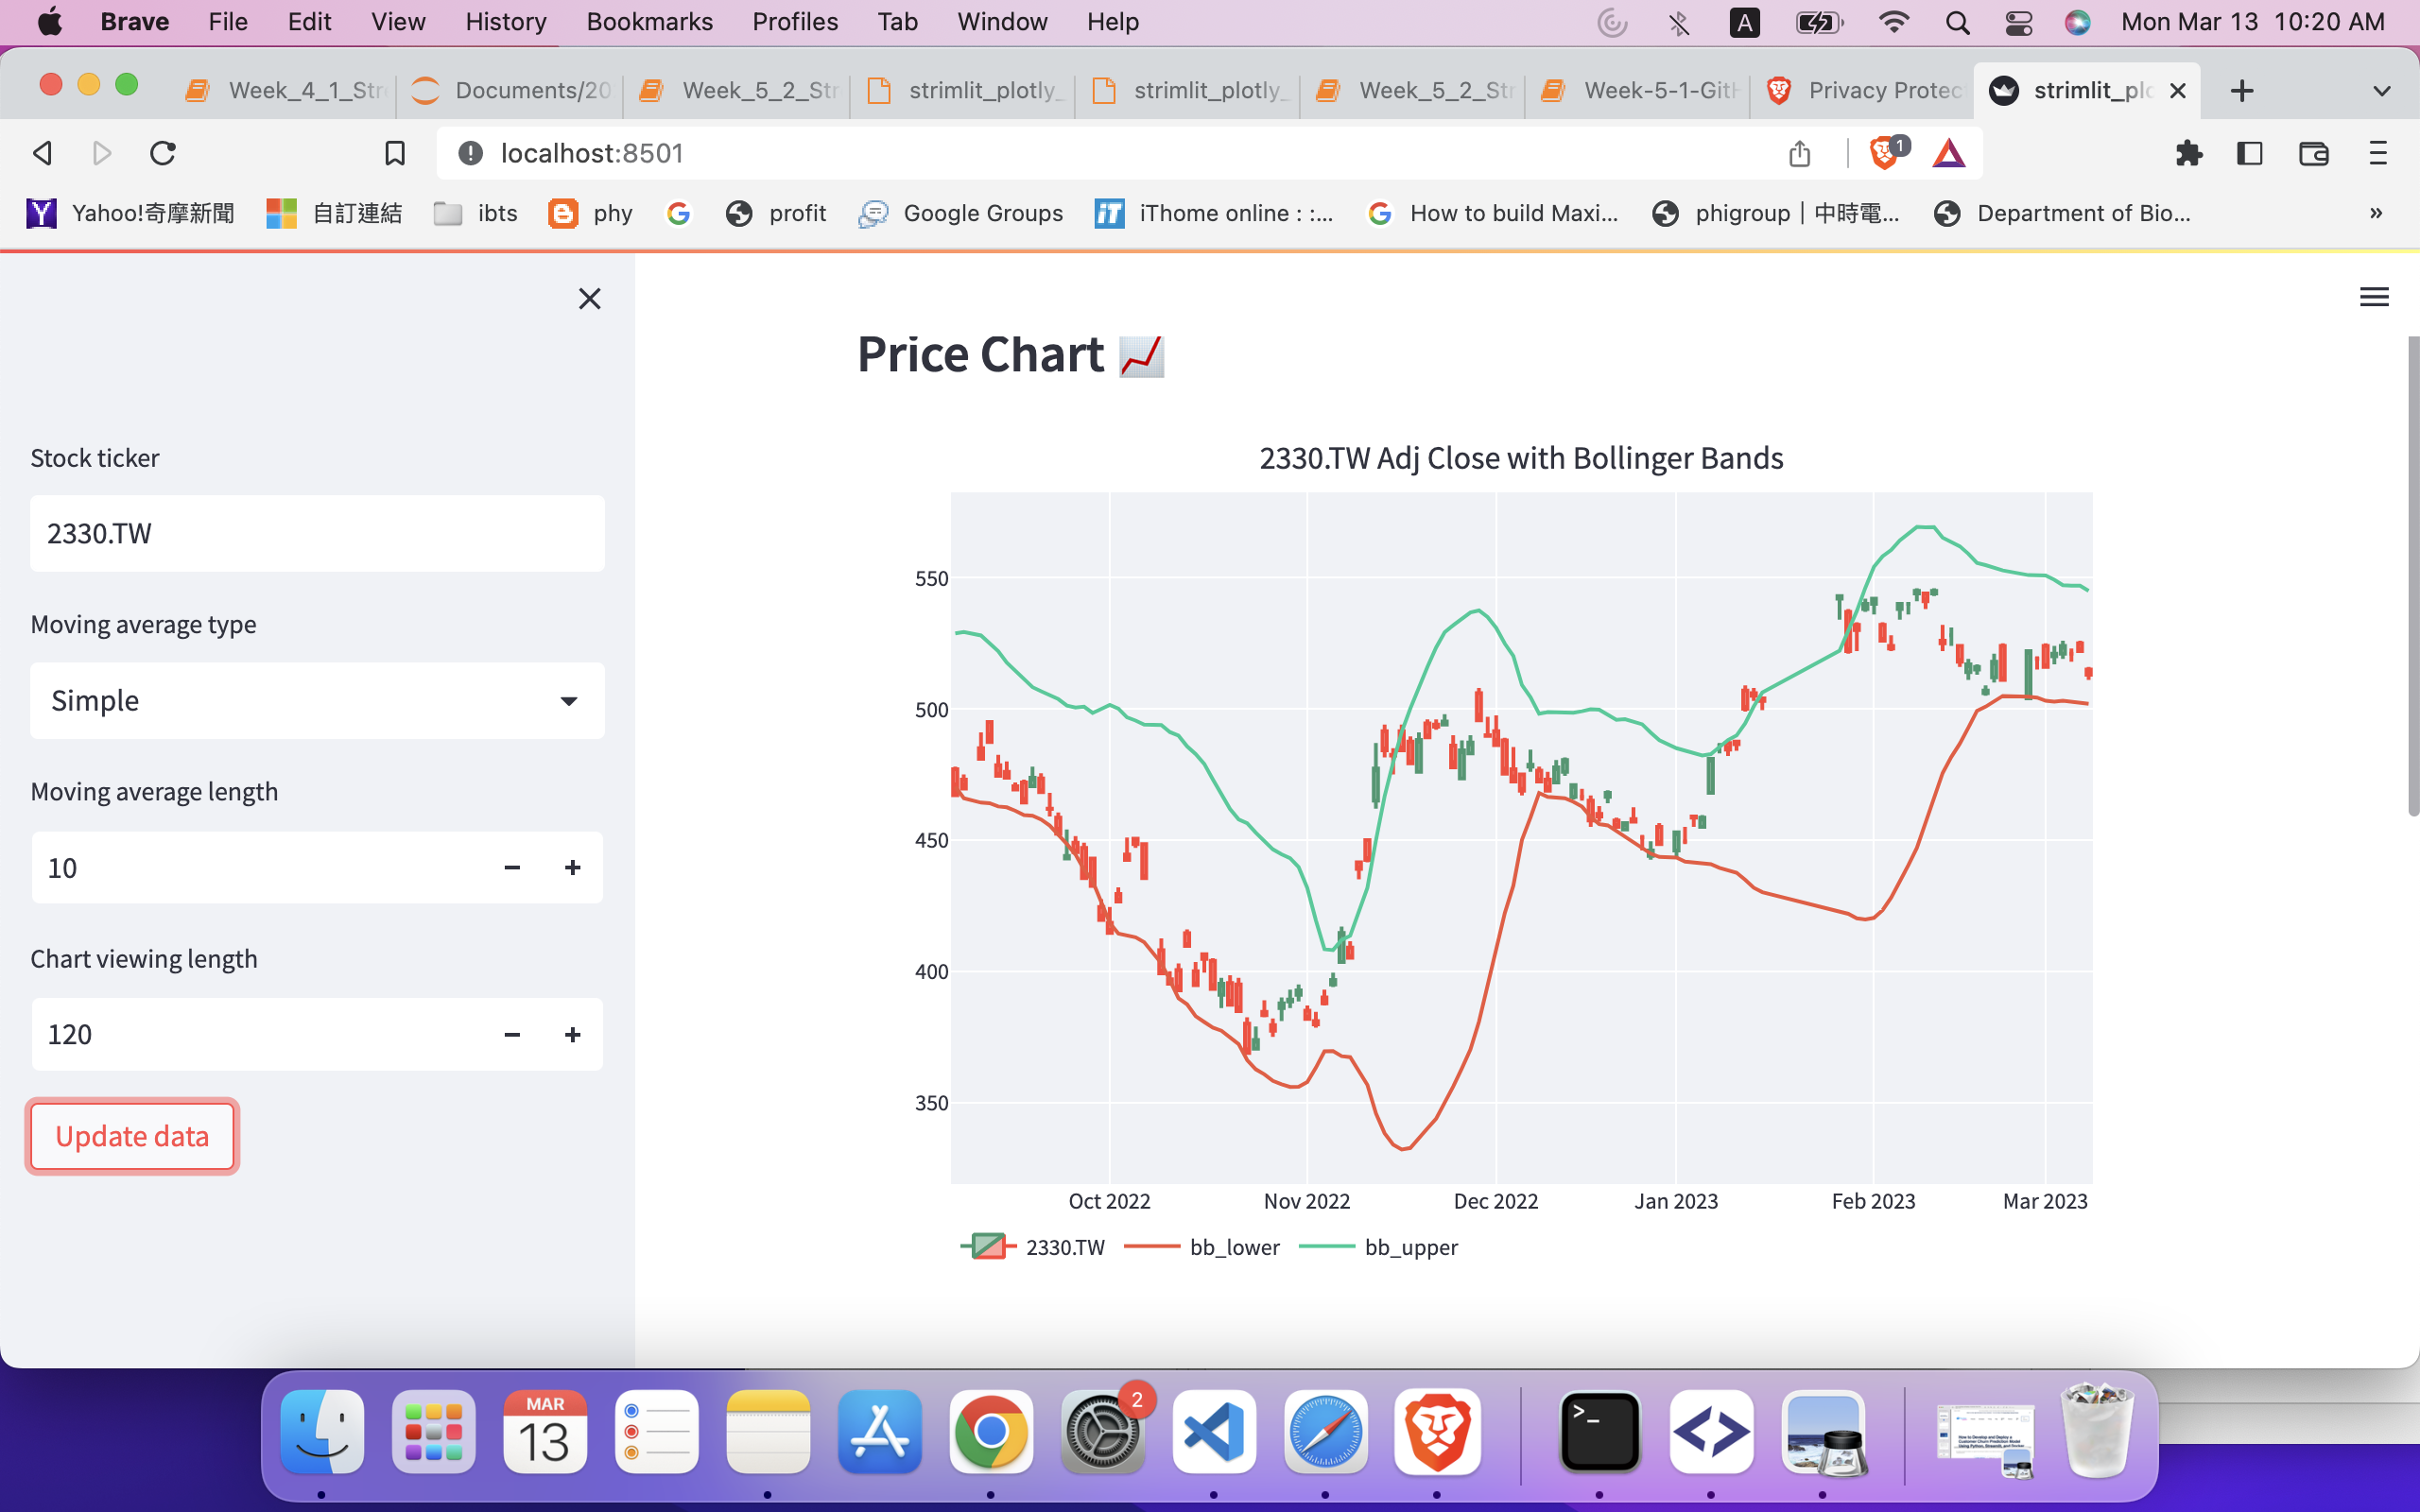

In [4]:
Image("imgs/dashboard.png",width=800)

In [1]:
# numerical and statistical utilities
import numpy as np

# visualization requirements
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as ex

# data utitilies
import yfinance as yf
import pandas as pd
import pandas_ta
import datetime as dt

import streamlit as st

In [13]:
import os
import pandas as pd
#import yfinance as yf
import streamlit as st

import plotly.graph_objects as go
import plotly.express as ex

In [3]:
# Observe recent changes
start = dt.datetime(2019, 1, 1).strftime('%Y-%m-%d')
end =  dt.date.today()

# set ticker's symbol in yahoo stock
ticker='2330.TW'

Error Exception, 錯誤處理
---
Suitable `Error Exception` could make the output clean to read and be easily to maintenance. 適當的使用錯誤處理，可以使得畫面乾淨並且容易維護，
```python
try:
    #process ...
except Exception as e: 
    # response if any error
```    

In [12]:
# create a function to download data and, excetion included
# 包裝下載程式，並包含錯誤處理
def get_data(ticker: str):
    
    try:
        df = yf.download(ticker, start = start, end = end)
        df['stoch_k'] = pandas_ta.stochrsi(close=df['Adj Close'],length=20).iloc[:,0]
        df['stoch_d'] = pandas_ta.stochrsi(close=df['Adj Close'],length=20).iloc[:,1]
        df['bb_lower'] = pandas_ta.bbands(close=df['Adj Close'],length=20).iloc[:,0]
        df['bb_upper'] = pandas_ta.bbands(close=df['Adj Close'],length=20).iloc[:,2]
        df['forward_1d'] = df['Adj Close'].pct_change(1).shift(-1)
        
    except Exception as e:
        st.write(e)
    
    return (
        df
    )


In [17]:
# visualization 縣市獨行
def get_bband(df,plot_days):
    df = df[-int(plot_days):]
    fig=ex.line(df, x=df.index, y=['Adj Close','bb_lower','bb_upper'], title='台積電 (2330.TW) Adj Close with Bollinger Bands')

    fig.update_layout(title_text=f'台積電 (2330.TW) Adj Close with Bollinger Bands', title_x=0.5,width = 800,
        height = 400,)
    return fig
    

Setup a Complete Dashboad, 設立看盤
---
three options are availed in side bar. 提供三個選項
1. ticker, 代碼
2. time period of visualization 觀察時間，
3. Update button, 更新鍵

In [6]:
# Sidebar controls -----------------------------------------------------------
ticker = st.sidebar.text_input(
    label='Stock ticker',
    value='2330.TW',    
)

plot_days = st.sidebar.number_input(
    label='Chart viewing length',
    value=120,
    min_value=1,
    step=1,
)

st.sidebar.button(
    label='Update data',
    on_click=get_data,
    kwargs={'ticker': ticker},
)


  command:

    streamlit run /Users/chu-chinghuang/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-03-12 21:56:33.049 
  command:

    streamlit run /Users/chu-chinghuang/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


False

In [ ]:
# Main part of Dashboard App, 看盤主程式
# get data and display data vis, 抓資料, 展示結果

df = get_data(ticker)
st.subheader('Price Chart')    

st.plotly_chart(
    get_bband(df,plot_days)
)

# complete code ...

Summary these, we had complete a simple but worked Dashboard artifact, 綜合上面，我們已經可以建立一個完整的看盤應用程式:

```python
# numerical and statistical utilities
import numpy as np

# visualization requirements
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as ex

# data utitilies
import yfinance as yf
import pandas as pd
import pandas_ta
import datetime as dt

import streamlit as st

# Observe recent changes
start = dt.datetime(2019, 1, 1).strftime('%Y-%m-%d')
end =  dt.date.today()

# set ticker's symbol in yahoo stock
#ticker='2330.TW'

def get_data(ticker: str):
    
    try:
        df = yf.download(ticker, start = start, end = end)
        df['stoch_k'] = pandas_ta.stochrsi(close=df['Adj Close'],length=20).iloc[:,0]
        df['stoch_d'] = pandas_ta.stochrsi(close=df['Adj Close'],length=20).iloc[:,1]
        df['bb_lower'] = pandas_ta.bbands(close=df['Adj Close'],length=20).iloc[:,0]
        df['bb_upper'] = pandas_ta.bbands(close=df['Adj Close'],length=20).iloc[:,2]
        df['forward_1d'] = df['Adj Close'].pct_change(1).shift(-1)
        
    except Exception as e:
        st.write(e)
    
    return (
        df
    )

def get_bband(df, plot_days):
    df = df[-int(plot_days):]
    title=ticker+' Adj Close with Bollinger Bands'
    fig=ex.line(df, x=df.index, y=['Adj Close','bb_lower','bb_upper'], title=title)

    fig.update_layout(title_text=title, title_x=0.5,width = 800,
        height = 400,)
    return fig

# Sidebar controls ---
ticker = st.sidebar.text_input(
    label='Stock ticker',
    value='2330.TW',    
)

plot_days = st.sidebar.number_input(
    label='Chart viewing length',
    value=120,
    min_value=1,
    step=1,
)

st.sidebar.button(
    label='Update data',
    on_click=get_data,
    kwargs={'ticker': ticker},
)

st.plotly_chart(
    get_bband(df,plot_days)
)
```


End Note, 
---
1. Name the file of code above as `streamlit_dashboard.py` and add it  to your repo to test, 將上列的完整程式碼, 令名為 `streamlit_dashboard.py`, 並將它加到你的資源庫去測試.
2. Furthermore, we can add more function to make the app colorful; for instance, add the `candlestick_chart`, 我們也可以加入更多的函數讓應用程式更多樣，例如加入燭火圖:
```python
def get_candlestick_chart_1(df, plot_days):
    df = df[-int(plot_days):]
    
    fig = go.Figure()
    
    fig.add_trace(
        go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Adj Close'],
            name=ticker,
            showlegend=True,
        )
    )
    fig.add_trace(
        go.Line(
            x=df.index,
            y=df['bb_lower'],name='bb_lower',
        )    
    )
    fig.add_trace(
        go.Line(
            x=df.index,
            y=df['bb_upper'], name='bb_upper',
        )    
    )    
    fig.update_xaxes(
        rangebreaks = [{'bounds': ['sat', 'mon']}],
        rangeslider_visible = False,
    )
    title=ticker+' Adj Close with Bollinger Bands'
    fig.update_layout(
        title_text=title, title_x=0.5,
        legend = {'x': 0, 'y': -0.05, 'orientation': 'h'},
        margin = {'l': 50, 'r': 50, 'b': 50, 't': 25},
        width = 800,
        height = 400,        
    )    
    return fig
```